# Trabajo 1 
## Estimación y Predicción en Series Temporales 
## Año 2024

### Datos del estudiante

*   **Nombre:** Federico Bello
*   **Cédula:** 4.993.837-3
*   **Firma:** (imagen o firma digital)


<hr>

**Nota:** Para trabajar, hágase una copia propia de este notebook en su espacio de Google Drive, o bien descárguese el archivo `.ipynb` y trabaje localmente con jupyter. 

<hr>

## Aclaraciones

El objetivo del trabajo es mostrar que el estudiante es capaz de resolver una serie de problemas teóricos e implementar y analizar una serie de problemas prácticos. En el primer caso, es fundamental justificar cualquier paso no trivial de la resolución. En el caso de problemas prácticos, es fundamental analizar y comentar todo resultado que se obtenga.

### Autoría

Esta es una tarea _individual_. Sus ejercicios deben ser resueltos por el estudiante cuyo nombre, cédula y firma se especifican al comienzo de este documento.

No es admisible la realización colectiva de ninguno de los ejercicios ni sus partes. Tampoco es admisible la búsqueda y/o reutilización, total o parcial, de material en Internet u otros medios, así como entregas disponibles de años anteriores.

Sí es admisible y aconsejable consultar, cotejar, e intercambiar ideas y sugerencias con otros estudiantes,  utilizar material de referencia tales como: documentación sobre lenguajes de programación, resultados, definiciones y propiedades matemáticas, incluyendo todo el material expuesto en este curso, tanto teórico como práctico. 

También es admisible la reproducción e inclusión de recetas y código relacionado con aspectos auxiliares, tales como el graficado de funciones, etc., que no hacen al objetivo de los ejercicios. 

### Sanciones

Cualquier violación a las anteriores reglas constituye una _falta disciplinaria_. En primera instancia, dicha falta implica la pérdida de los puntos del obligatorio en su totalidad. En caso de reincidencia, se desvinculará al estudiante del curso y quedará registrado como reprobado.

### Conformidad

Mediante la entrega de este informa firmado, dejo constancia de que:

i) He leído y estoy de acuerdo con lo anteriormente expuesto.   
ii) He resuelto por mi propia cuenta los ejercicios, sin recurrir a trabajos de otros compañeros, o soluciones existentes.   
iii) No se incluyen partes ni fragmentos tomados de otras fuentes, salvo las excepciones mencionadas.


## Ejercicio 1: introducción a los estimadores (30pts)


Considere las observaciones

$$x(n) = A + w(n); \quad n=0,1,\dots,N-1$$

donde $A \in \mathbb{R}$ es un parámetro desconocido y $w(n)$ es ruido blanco gaussiano ($w(n) \sim N(0,\sigma ^2)$). Considere el estimador de $A$ dado por la media muestral:

$$\hat{A} = \frac{1}{N} \sum_{n=0}^{N-1} x[n]$$

## Ejercicio 1.1

Mostrar que $\hat{A} \sim  \mathcal{N}(A,\sigma ^2/N)$. Se sugiere utilizar las propiedades conocidas de sumas de variables aleatorias independientes, esperanza y varianza.

-----------------------------------------------------
#### Respuesta: 

Se tiene por definición que: $$\hat{A} = \frac{1}{N} \sum_{n=0}^{N-1} x[n]$$.
Tomando la esperanza de $\hat{A}$ se tiene que:

$$E\{\hat{A}\} = E\left\{\frac{1}{N} \sum_{n=0}^{N-1} x[n]\right\} \overbrace{=}^{(1)}  \frac{1}{N} \sum_{n=0}^{N-1} E\{A + w[n]\} \overbrace{=}^{(2)} \frac{1}{N} \sum_{n=0}^{N-1} E\{A\} + \frac{1}{N} \sum_{n=0}^{N-1} E\{w[n]\} \overbrace{=}^{(3)} \frac{1}{N}N A = A$$

donde (1) surge de la linealidad de la esperanza, (2) de imponer que $A$ y $w[n]$ son independientes y (3) de utilizar que la media del ruido es 0 y la media de una constante es la constante. Por lo tanto, la esperanza de $\hat{A}$ es $A$, obteniendo así que el estimador es insesgado.

Por otro lado, la varianza de $\hat{A}$ se puede calcular de la siguiente manera:

$$Var\{\hat{A}\} = Var\left\{\frac{1}{N} \sum_{n=0}^{N-1} x[n]\right\} \overbrace{=}^{(1)} \frac{1}{N^2} \sum_{n=0}^{N-1} Var\{x[n]\} = \frac{1}{N^2} \sum_{n=0}^{N-1} Var\{A + w[n]\} \overbrace{=}^{(2)} \frac{1}{N^2} \sum_{n=0}^{N-1} Var\{w[n]\} \overbrace{=}^{(3)} \frac{1}{N^2} N \sigma^2 = \frac{\sigma^2}{N}$$

donde los pasos (1) y (2) salen de aplciar la propiedad $var(aX+b) = a^2var(X)$. El paso (3) es simplemente sustituir por la varianza del ruido. Observando que $\hat{A}$ es la suma de dos variables independientes gaussianas se puede concluir que $\hat{A}$ es una variable aleatoria gaussiana con media $A$ y varianza $\sigma^2/N$: $\hat{A} \sim \mathcal{N}(A,\sigma^2/N)$.

Otro enfoque pudo haber sido, primero observar que es la suma de dos variables independientes gaussianas y luego utilizar la propiedad de que si $X \sim \mathcal{N}(\mu_x, \sigma_x^2)$ y $Y \sim \mathcal{N}(\mu_y, \sigma_y^2)$ entonces su suma  $Z = X+Y$ tiene distribución normal con media la suma de las medias y varianza la suma de las varianzas: $Z \sim \mathcal{N}(\mu_x + \mu_y, \sigma_x^2 + \sigma_y^2)$.

-----------------------------------------------------


Con el objetivo de verificar de forma práctica el resultado anterior se propone la siguiente simulación:  

1.   Generar $N=20$ observaciones de $x[n]$, con $A=10$ y $\sigma^2=1$. Se sugiere utilizar la biblioteca `numpy.random` para generar números pseudoaleatorios de alta calidad. 
1.   Calcular el estimador $\hat{A}$. Se sugiere utilizar la función `numpy.mean`.
1.   Calcular el estimador $\breve{A}=x[0]$



### Ejercicio 1.2

Complete el siguiente código de modo que:
   1. Repita los pasos 1, 2 y 3 $M=1000$ veces.  
   1. Calcular la media y la varianza empíricas de cada estimador.  
   1. Mostrar el histograma para ambos estimadores  

Importante: **Comente los resultados**


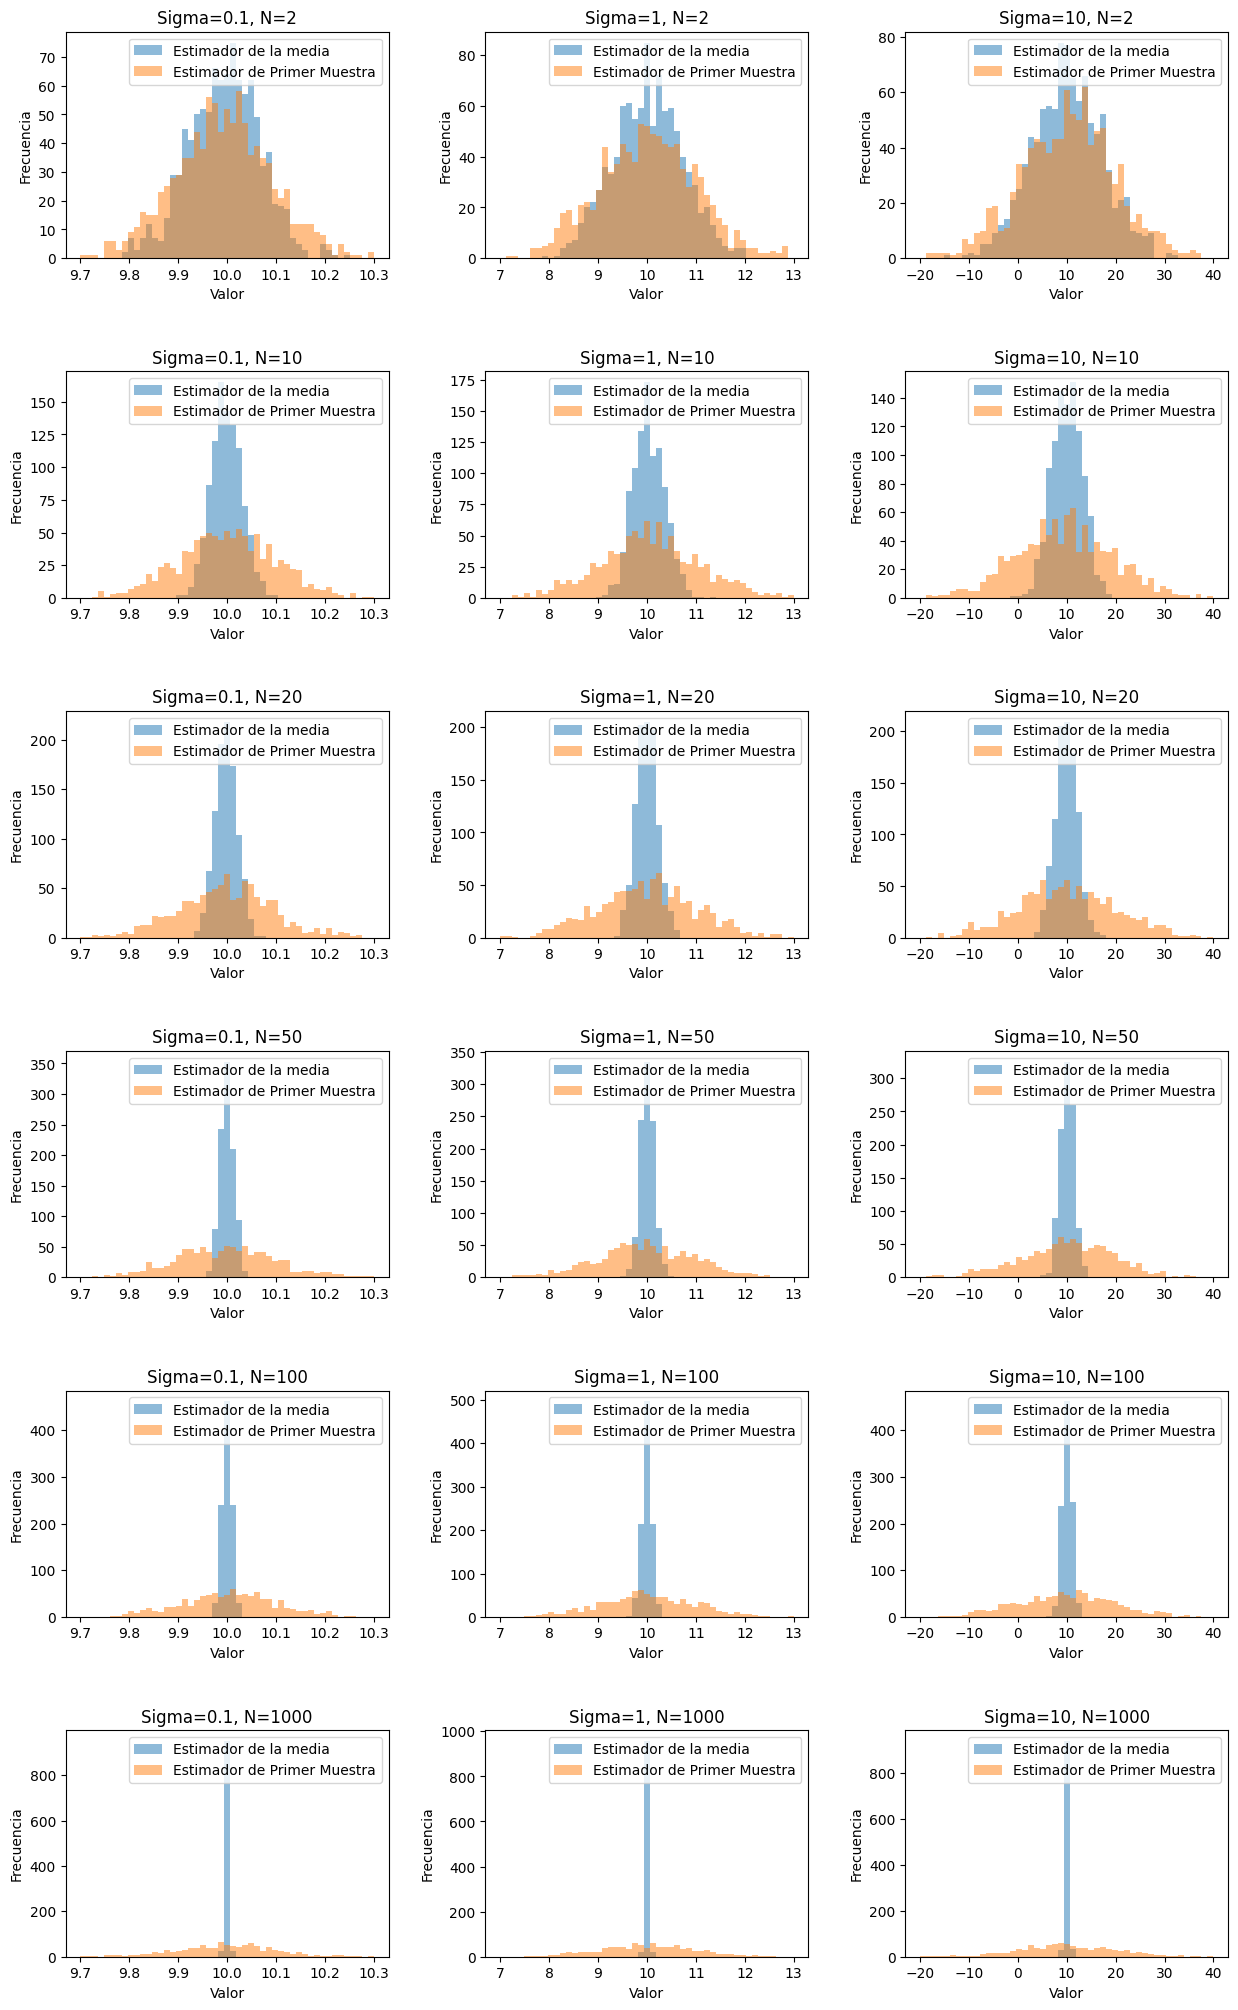

In [16]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

semilla = 42
rng = random.default_rng(semilla)

N = [2, 10, 20, 50, 100, 1000]            # cantidad de muestras
A = 10             # valor real del parámetro
sigma  = [0.1, 1, 10]        # desviación estándar
sigma2 = np.power(sigma,2) # varianza (conocida)
M = 1000

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 25))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

plot_row = 0
plot_col = 0
for n in N:
    for s in sigma:
        A_gorro = np.empty(M)
        A_cuerno = np.empty(M)
        
        for i in range(M):
            x = rng.normal(loc=A, scale=s, size=n)
            A_gorro[i] = np.mean(x)
            A_cuerno[i] = x[0]

        
        bins = np.linspace(A - 3 * s, A + 3 * s, 50)
        A_gorro_mean = np.mean(A_gorro)
        A_cuerno_mean = np.mean(A_cuerno)
        A_gorro_var= np.var(A_gorro)
        A_cuerno_var = np.var(A_cuerno)
        axes[plot_row, plot_col].hist(A_gorro, bins=bins, alpha=0.5, label='Estimador de la media')
        axes[plot_row, plot_col].hist(A_cuerno, bins=bins, alpha=0.5, label='Estimador de Primer Muestra')
        axes[plot_row, plot_col].set_title(f'Sigma={s}, N={n}')
        axes[plot_row, plot_col].set_xlabel('Valor')
        axes[plot_row, plot_col].set_ylabel('Frecuencia')
        axes[plot_row, plot_col].legend()

        plot_col += 1
        if plot_col >= 3:
            plot_row += 1
            plot_col = 0

plt.show()


---------------

### Comentarios:

En la figura de arriba se ve claramente como el estimador $\hat{A}$ es insesgado, ya que su media es cercana a 10, valor real de $A$. El estimador $\breve{A}$ también es insesgado, ya que su media tiende a $A$, sin embargo, su varianza es mucho mayor que la de $\hat{A}$, lo que lo hace un estimador menos eficiente (observar el eje de las abscisas).

También se ve el efecto que tiene la varianza en la distribución de los estimadores. A medida que la varianza aumenta, la distribución de los estimadores se va haciendo más ancha, lo que implica que la varianza de los estimadores aumenta. Sin embargo, esto se puede contrarrestar en el caso del estimador de la media muestral tomando más muestras, ya que, como se demostró anteriormente, la varianza de $\hat{A}$ es inversamente proporcional al número de muestras.

---------------

### Ejercicio 1.3

Considere el siguiente estimador alternativo:

$$\tilde{A} = \frac{1}{2N} \sum_{n=0}^{N-1} x[n]$$

Muestre que $\tilde{A}$ es inferior a $\hat{A}$ desde el punto de vista del MSE.


---------------------------------

### Respuesta:

Sabemos por el teórico que el MSE de un estimador se puede descomponer en sesgo y varianza. Por lo tanto, el MSE de un estimador insesgado es tan solo su varianza. Por lo tanto, el estimador de la media muestral tiene un MSE igual a $\frac{\sigma^2}{N}$.

Siguiendo un razonamiento similar a la parte 1.1 se puede calcular la media de $\tilde{A}$ como:

$$
E\{\tilde{A}\} = E\left\{\frac{1}{2N} \sum_{n=0}^{N-1} x[n]\right\} = \frac{1}{2N} \sum_{n=0}^{N-1} E\{x[n]\} = \frac{1}{2N} \sum_{n=0}^{N-1} A = \frac{A}{2}
$$

por lo que el estimador no es insesgado.

Por otro lado, su varianza se puede calcular como:

$$
Var\{\tilde{A}\} = Var\left\{\frac{1}{2N} \sum_{n=0}^{N-1} x[n]\right\} = \frac{1}{4N^2} \sum_{n=0}^{N-1} Var\{x[n]\} = \frac{1}{4N^2} \sum_{n=0}^{N-1} \sigma^2 = \frac{\sigma^2}{4N}
$$

Por lo tanto, el MSE de $\tilde{A}$ es $\frac{A}{2} + \frac{\sigma^2}{4N}$, mayor al MSE de $\hat{A}$.


---------------------------------

## Ejercicio 2: MVU en distribucion uniforme (35pts)

Se observa el conjunto de datos $\left \{ x[0], x[1], \ldots, x[N-1]) \right \}$, donde las muestras $x[n]$ son independientes e idénticamente distribuidas según la distribución uniforme $U(0, \theta)$. Se quiere encontrar un estimador insesgado de $\theta$.

### Ejercicio 2.1

Se considera la variable aleatoria 

$T = \max\left \{ x[0], x[1], ..., x[N-1] \right \}$  
a) Calcular la densidad de probabilidad $p(T)$ de $T$.  
b) Calcular la esperanza de $T$.  
c) Proponer un estimador insesgado $\hat{\theta}$ de $\theta$ a partir de $T$.


-------------------
## Respuesta:

a) Un posible camino para calcular la densidad de probabilidad de $T$ es primero calcular la función de distribución acumulada de $T$ y luego derivarla. Primero, para calcular la CDF the $T$ hay que notar que la probabilidad de que $T$ sea menor o igual a un valor $t$ es la probabilidad de que todas las muestras sean menores o iguales a $t$. Ademas, las muestras son independientes, por lo que se llega a que:

$$
P(T \leq t) = P(x[0] \leq t, x[1] \leq t, \ldots, x[N-1] \leq t) = \prod_{i=0}^{i=N-1}P(x[i]\leq t) = P(x[0] \leq t)^N
$$

Dado que $x[i]$ sigue una distribución uniforme, la probabilidad de que $x[i]$ sea menor o igual a $t$ es simplemente $t/\theta$. Por lo tanto, la CDF de $T$ es:
$$
F_T(t) = P(T \leq t) = \left(\frac{t}{\theta}\right)^N
$$

Finalmente, derivando el resultado se obtiene la pdf de $T$:
$$
p(T)= N \frac{t^{N-1}}{\theta^N}
$$

b) La esperanza de $T$ no es mas que el primer momento de $T$, por lo que se puede calcular como:

$$
E\{T\} = \int_{0}^{\theta} t p(T) dt = \int_{0}^{\theta} t N \frac{t^{N-1}}{\theta^N} dt = N \frac{1}{\theta^N} \int_{0}^{\theta} t^{N} dt = N \frac{1}{\theta^N} \frac{t^{N+1}}{N+1} \Big|_{0}^{\theta} = \frac{N}{N+1} \theta
$$

c) Para tener un estimador insesgado, se quiere obtener un estimador que esperanza que $\theta$. Por lo tanto, el estimador $\hat{\theta}$ se puede definir como:
$$
\hat{\theta} = \frac{N+1}{N} T
$$

de esta forma se obtiene que el estimador tiene esperanza $\theta$.

-------------------


### Ejercicio 2.2

Proponer otro estimador insesgado $\breve{\theta}$ de $\theta$ a partir de la media muestral.  

-----------

## Respuesta:

Se sabe que la media de una variable uniforme $\mathcal{U}(a,b)$ es $\frac{a+b}{2}$. Por lo tanto, la media de la variable $x[n]$ es $\frac{\theta}{2}$. Por lo tanto, un estimador insesgado de $\theta$ es simplemente el doble de la media muestral:

$$
\breve{\theta} = 2 \frac{1}{N} \sum_{n=0}^{N-1} x[n]
$$

Por otro lado, la varianza de este estimador se puede calcular como:
$$
var(\breve{\theta}) = 4 var\left(\frac{1}{N} \sum_{n=0}^{N-1} x[n]\right) = 4 \frac{1}{N^2} \sum_{n=0}^{N-1} var(x[n]) \overbrace{=}^{(1)} 4 \frac{1}{N^2} \sum_{n=0}^{N-1} \frac{\theta^2}{12} = \frac{\theta^2}{3N}
$$

donde (1) sale de aplciar la varianza de una variable uniforme.

----------

### Ejercicio 2.3

1.   Verificar si se cumplen las hipótesis de regularidad de Cramer-Rao.
1.   En base a lo anterior, determinar si es posible utilizar CRLB en este caso.  
1.   Responder: qué implica lo anterior respecto a la existencia y unicidad de un estimador MVU en este caso?
---------------------
## Respuesta:

1) La pdf $p(x,\theta)$ de $x$ es $1/\theta$ si $0 \leq x \leq \theta$ y 0 en otro caso. Por lo tanto, se tiene que:

$$
\mathbb{E}_x \left[ \frac{\partial \log p(x; \theta)}{\partial \theta} \right] = \mathbb{E}_x \left[ \frac{\partial \log \frac{1}{\theta}}{\partial \theta} \right] = \mathbb{E}_x\left[ -\frac{1}{\theta} \right] = -\frac{1}{\theta} \neq 0
$$
es decir, no se cumple la hipotesis de regularidad.

2) Dado que no se cumple la hipotesis de regularidad, no se puede utilizar la CRLB en este caso, ya que no aplica la cota inferior de Cramer-Rao.

3) No poder aplicar la CRLB implica que no es posible afirmar que exista un estimador de varianza mínima insesgado (MVU). Sin embargo, la ausencia del CRLB no descarta automáticamente la existencia de un estimador MVU.

---------------------


### Ejercicio 2.4

Calcular la varianza del estimador $\hat{\theta}$

Para calcular la varianza de $\hat{\theta}$ se comienza calculando la varianza de $T$ como:

$$
var\{T\} \overbrace{=}^{(1)} E\{T^2\} - E\{T\}^2 \overbrace{=}^{(1)}\int_{0}^{\theta} t^2 p(T) dt - \left(\frac{N}{N+1} \theta\right)^2 = \int_{0}^{\theta} t^2 N \frac{t^{N-1}}{\theta^N} dt - \left(\frac{N}{N+1} \theta\right)^2 = N \frac{1}{\theta^N} \int_{0}^{\theta} t^{N+1} dt - \left(\frac{N}{N+1} \theta\right)^2 = \frac{N}{N+2} \theta^2 - \left(\frac{N}{N+1} \theta\right)^2 = \frac{N}{(N+2)(N+1)} \theta^2
$$

Finalmente, la varianza de $\hat{\theta}$ es:

$$
Var\{\hat{\theta}\} = Var\left\{\frac{N+1}{N} T\right\} = \left(\frac{N+1}{N}\right)^2 Var\{T\} = \left(\frac{N+1}{N}\right)^2\frac{N}{(N+2)(N+1)^2} \theta^2 = \frac{1}{N(N+2)} \theta^2
$$

## Ejercicio 2.5  

Verificar experimentalmente el resultado de la parte anterior estimando  $\theta$ usando los  estimadores $\hat{\theta}$ y $\breve{\theta}$ definidos anteriormente sobre $10000$ realizaciones de $\mathbf{x}$ distribuidas uniformemente entre $0$ y $\theta=10$. Repetir el experimento para  $N = 1, 2, 4, 100$, mostrando los histogramas correspondientes. Comente los resultados, (por ejemplo, comparar con los resultados obtenidos en el primer ejercicio).


N     |  Estimador maximo media   |  Estimador maximo var    |    Estimador 2*media media  |   Estimador 2*media var
1     |     5.040943848370191    |     8.191809587525471      |      10.081887696740383    |     32.767238350101884
2     |     6.672717212053036    |     5.601233471552321      |      10.003228101634278    |     16.75432264958484
4     |     8.007549878807605    |     2.6886665653082558      |      9.99321957699618    |     8.271535079960067
100     |     9.9020612898449    |     0.009443406164788417      |      9.999396972282842    |     0.3348607694648602
1000     |     9.99001392568564    |     9.938444813885116e-05      |      10.003747656529455    |     0.03368034893787412


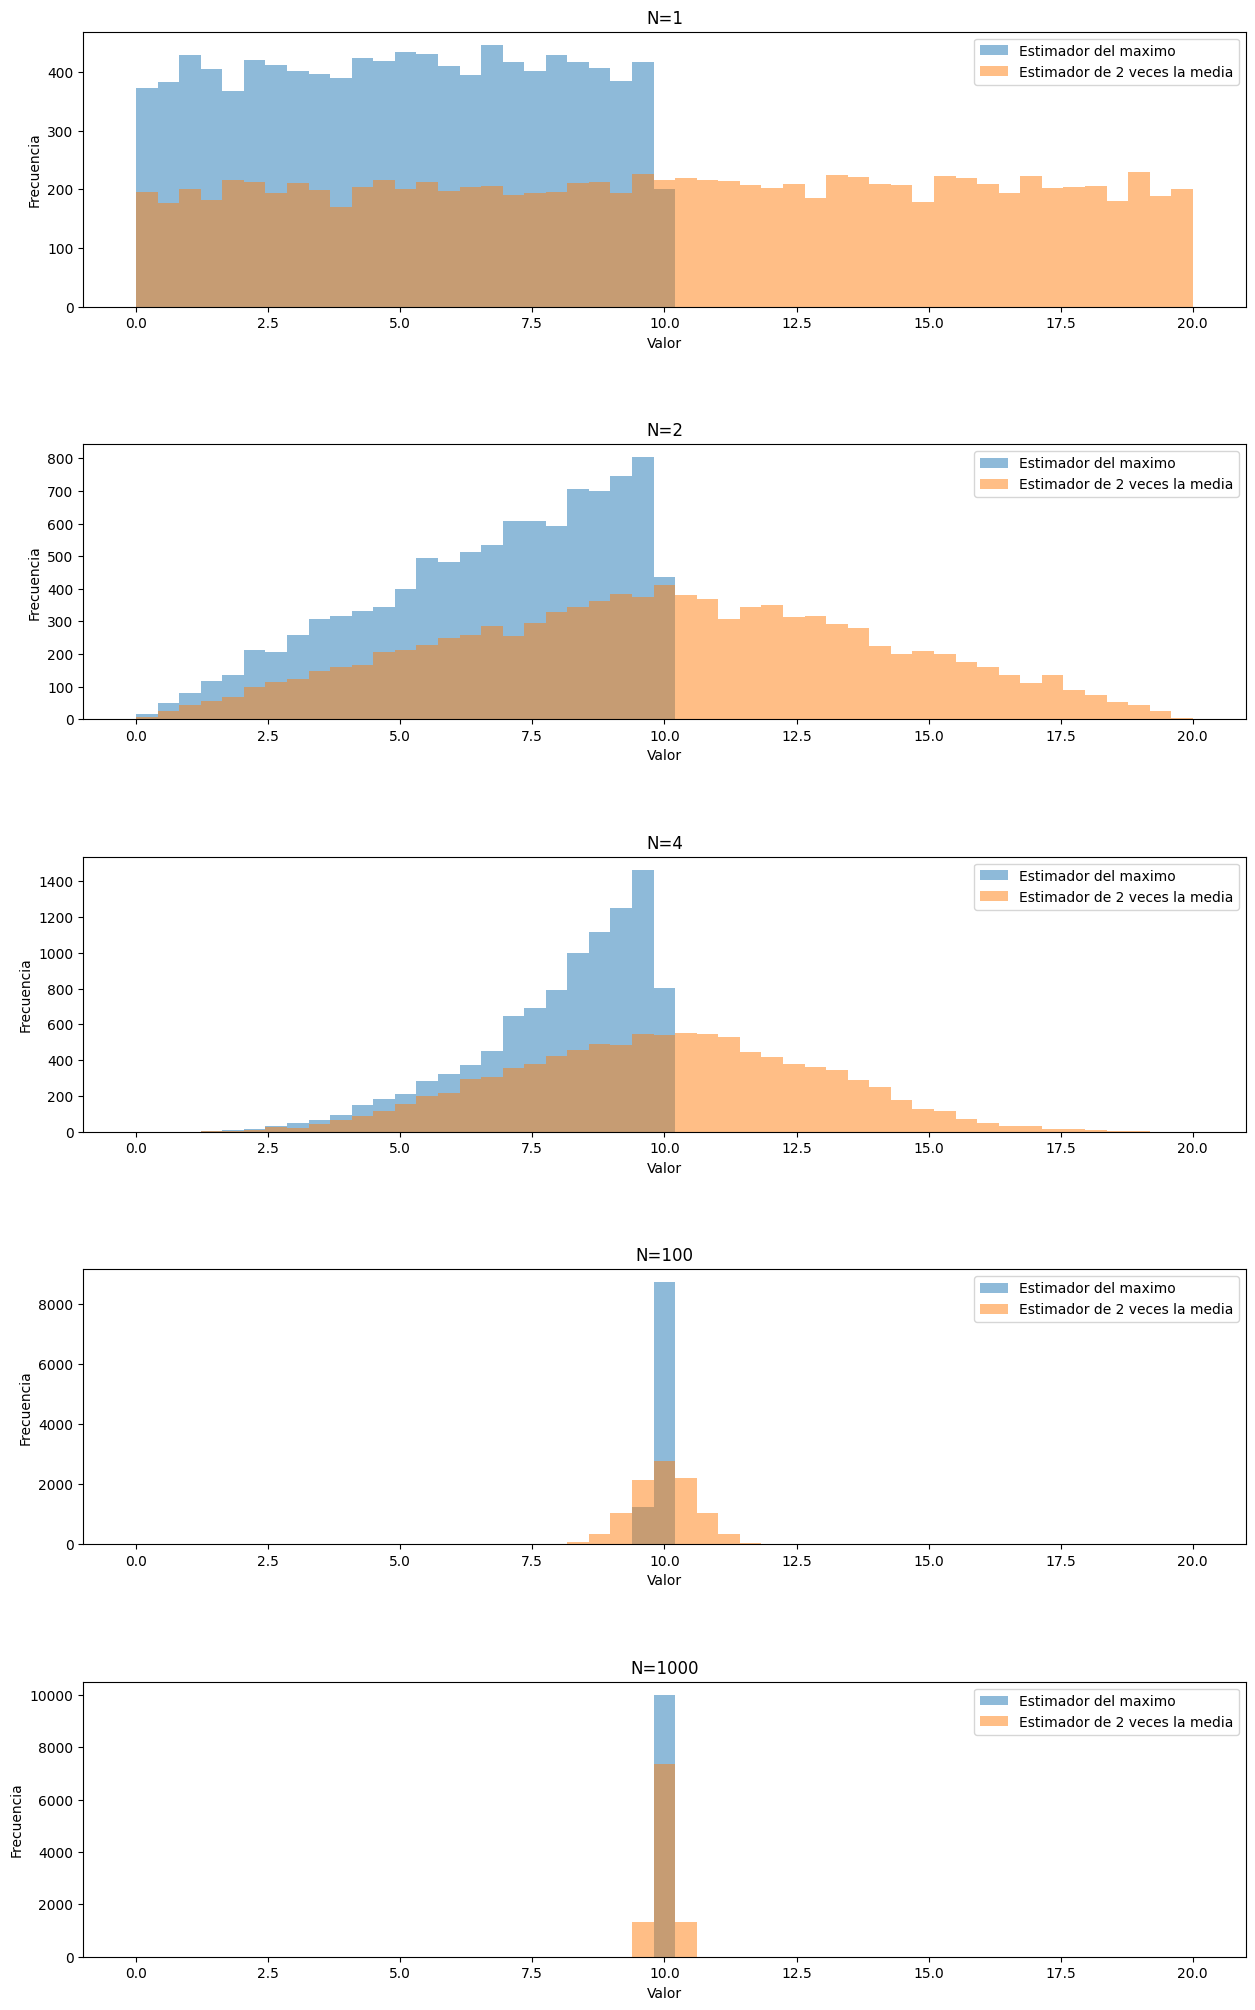

In [40]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

semilla = 42
rng = random.default_rng(semilla)

N = [1,2,4,100, 1000]            # cantidad de muestras
theta = 10             # valor real del parámetro
M = 10000 # cantidad de experimentos

fig, axes = plt.subplots(nrows=len(N), ncols=1, figsize=(15, 25))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
sigma
plot_row = 0
print(f'N     |  Estimador maximo media   |  Estimador maximo var    |    Estimador 2*media media  |   Estimador 2*media var')

for n in N:
        A_gorro = np.empty(M)
        A_cuerno = np.empty(M)
        
        for i in range(M):
            x = np.random.uniform(low=0, high=theta, size=n)
            A_gorro[i] = np.max(x)
            A_cuerno[i] = np.mean(x)*2

        bins = np.linspace(0,theta*2, 50)
        A_gorro_mean = np.mean(A_gorro)
        A_cuerno_mean = np.mean(A_cuerno)
        A_gorro_var= np.var(A_gorro)
        A_cuerno_var = np.var(A_cuerno)
        print(f'{n}     |     {A_gorro_mean}    |     {A_gorro_var}      |      {A_cuerno_mean}    |     {A_cuerno_var}')
        axes[plot_row].hist(A_gorro, bins=bins, alpha=0.5, label='Estimador del maximo')
        axes[plot_row].hist(A_cuerno, bins=bins, alpha=0.5, label='Estimador de 2 veces la media')
        axes[plot_row].set_title(f'N={n}')
        axes[plot_row].set_xlabel('Valor')
        axes[plot_row].set_ylabel('Frecuencia')
        axes[plot_row].legend()

        plot_row += 1

plt.show()


### Comentarios:

En la tabla y en los histogramas se ve como ambos estimadores son insesgados, ya que su media tiende a $\theta$. Sin embargo, el estimador $\hat{\theta}$ tiene una varianza mucho menor que la de $\breve{\theta}$, lo que lo hace un estimador más eficiente. Esto se puede ver en los histogramas, donde la distribución de $\hat{\theta}$ es más estrecha que la de $\breve{\theta}$. Tambien se puede ver en la tabla, donde se encuentra el promedio de la varianza y la media de cada estimador para cada experimento.

En la figura de la celda de abajo, se ve como varia la varianza teorica de ambos estimadores. Resulta interesante notar como para $N=1$ la varianza de cada uno es igual, sin embargo, la de $\hat{\theta}$ es sensiblemente menor para $N>1$.

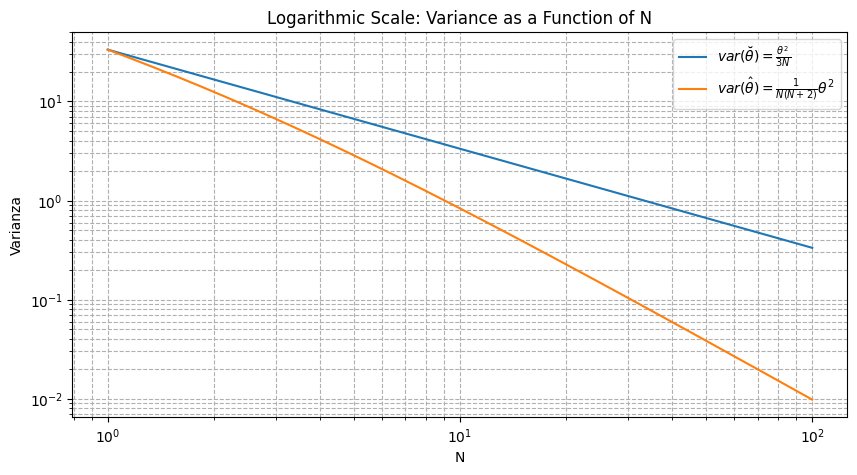

In [48]:
import numpy as np
import matplotlib.pyplot as plt

theta = 10
N = np.logspace(0, 2, 400)  

variance1 = (theta**2) / (3 * N)
variance2 = (theta**2) / (N * (N + 2))

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(N, variance1, label=r'$var(\breve{\theta})=\frac{{\theta^2}}{{3N}}$')
plt.plot(N, variance2, label=r'$var(\hat{\theta})=\frac{{1}}{{N(N+2)}} \theta^2$')
plt.xlabel('N')
plt.ylabel('Varianza')
plt.title('Logarithmic Scale: Variance as a Function of N')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")  
plt.show()


## Ejercicio 3: estimación de fase (35pts)

Se desea estimar la fase de una sinusoide de amplitud y frecuencia conocidas
contaminada con ruido blanco gaussiano de varianza $\sigma^2$ a partir de N medidas:  
$$ x[n] = A \cos(2 \pi f_0 n + \phi) + w[n], \;   n=0, 1, ..., N-1$$

### Ejercicio 3.1

Se puede mostrar fácilmente (aunque con muchas cuentas) que en este caso no es posible encontrar un estimador eficiente (ver libro). Como alternativa se propoe el siguiente estimador $\theta = [\cos \phi, \sin \phi]^T$ . Mostrar que este problema puede formularse como un modelo lineal $X = H\theta + W$, y explicitar $H$.

----------
### Respuesta:

Para encarar el problema, es una buena opción primero descomponer la señal en frecuencia y fase por separado. Para ello, se puede utilizar la identidad trigonometrica $\cos(a+b) = \cos(a)\cos(b) - \sin(a)\sin(b)$, de donde se obtiene que:

$$
x[n] = A \cos(2 \pi f_0 n + \phi) + w[n] = A \cos(2 \pi f_0 n) \cos(\phi) - A \sin(2 \pi f_0 n) \sin(\phi) + w[n] 
$$

De esta forma, resulta facil ver que el problema se puede formular como un modelo lineal de la forma $X = H\theta + W$, donde la matrix $H$ viene dada por:

$$
H = A \begin{bmatrix}
\cos(2 \pi f_0 \cdot 0) & \sin(2 \pi f_0 \cdot 0) \\
\cos(2 \pi f_0 \cdot 1) & \sin(2 \pi f_0 \cdot 1) \\
\vdots & \vdots \\
\cos(2 \pi f_0 \cdot (N-1)) & \sin(2 \pi f_0 \cdot (N-1))
\end{bmatrix}
$$

y la matriz $W$ es la matriz con el ruido:

$$
W = \begin{bmatrix}
w[0] \\
w[1] \\
\vdots \\
w[N-1]
\end{bmatrix}
$$

Por lo tanto, reescribiendo todo se tiene que:

$$
X = \begin{bmatrix}
x[0] \\
x[1] \\
\vdots \\
x[N-1]
\end{bmatrix}
= A \begin{bmatrix}
\cos(2 \pi f_0 \cdot 0) & \sin(2 \pi f_0 \cdot 0) \\
\cos(2 \pi f_0 \cdot 1) & \sin(2 \pi f_0 \cdot 1) \\
\vdots & \vdots \\
\cos(2 \pi f_0 \cdot (N-1)) & \sin(2 \pi f_0 \cdot (N-1))
\end{bmatrix}
\begin{bmatrix}
\cos(\phi) \\
\sin(\phi)
\end{bmatrix}
+
\begin{bmatrix}
w[0] \\
w[1] \\
\vdots \\
w[N-1]
\end{bmatrix}
$$

-------

### Ejercicio 3.2

Demostrar que con esta nueva formulación existe un estimador eficiente $\hat{\theta}$ de $\theta$. Expresar $\hat{\theta}$ y su varianza en función de $H$ y $\sigma^2$.

---------

### Respuesta:

Como el problema se puede formular como un modelo lineal, se sabe que existe un estimador eficiente $\hat{\theta}$ y se puede calcular como: $\hat{\theta} = (H^T H)^{-1} H^T X$. Se tiene que:

$$
H^T H = A^2\begin{bmatrix}
\sum_{k=0}^{N-1} \cos^2(2 \pi f_0 k) & \sum_{k=0}^{N-1} \cos(2 \pi f_0 k) \sin(2 \pi f_0 k) \\
\sum_{k=0}^{N-1} \cos(2 \pi f_0 k) \sin(2 \pi f_0 k) & \sum_{k=0}^{N-1} \sin^2(2 \pi f_0 k)
\end{bmatrix}
$$

Por la ortogonalidad de las funciones seno y coseno, se tiene que:
- $\sum_{k=0}^{N-1} \cos^2(2 \pi f_0 k) = \frac{N}{2}$
- $\sum_{k=0}^{N-1} \sin^2(2 \pi f_0 k) = \frac{N}{2}$
- $\sum_{k=0}^{N-1} \cos(2 \pi f_0 k) \sin(2 \pi f_0 k) = 0$


Imponiendo el resultado anterior, se obtiene una matriz diagonal, por lo tanto calcular la inversa es tan solo invertir cada entrada, obteniendo asi que:
$$
(H^T H)^{-1} = \frac{2}{NA^2} I
$$

donde $I$ representa la matriz identidad 2x2. Finalmente, el estimador eficiente $\hat{\theta}$ se puede calcular como:

$$
(H^T H)^{-1} H^T x= \frac{2}{NA} H^T x= \frac{2}{N} \begin{bmatrix}
\cos(0) & \cos(2 \pi f_0) & \cdots & \cos(2 \pi f_0 \cdot (N-1)) \\
\sin(0) & \sin(2 \pi f_0) & \cdots & \sin(2 \pi f_0 \cdot (N-1))
\end{bmatrix}x
$$

Por ultimo, la varianza de un estimador lineal viene dada por:

$$
var(\hat{\theta}) = \sigma^2 (H^T H)^{-1} = \frac{2 \sigma^2}{NA^2} I
$$


---------


### Ejercicio 3.4 

Se considera ahora el estimador $\hat{\phi} = \arctan\left( \frac{\widehat{\sin \phi}}{\widehat{\cos \phi}} \right) = \arctan\left( \frac{\hat\theta[1]}{\hat\theta[0]} \right) = g(\hat\theta)$.  
*   ¿Es eficiente?  
*   ¿Es asintóticamente eficiente?   

**Justifique ambas respuestas**

------

### Respuesta:

Se sabe por el teorico que una transformacion no afin destruye la eficiencia del estimador, aunque el estimador insesgado es asintoticamente insesgado y eficiente. Esto quiere decir que si bien no es eficiente, para una gran cantidad de muestras converge a un estimador eficiente. Como la transformacion $\arctan$ no es afin, el estimador $\hat{\phi}$ no es eficiente. Sin embargo, si es asintoticamente eficiente, ya que para una gran cantidad de muestras converge a un estimador eficiente.

------

### Ejercicio 3.5

Verificar experimentalmente los resultados para $A = 1,\; f_0 = 1/8,\; \phi = \pi/6,\; \sigma^2 = 5$ y para N=100, 500, 1000, 5000, 10000.  
a) Simular $\textbf{x}$ y calcular numéricamente los estimadores de $\cos(\phi)$ y $\sin(\phi)$  repitiendo el experimento M = 10000 veces para poder obtener la estadı́stica de los estimadores.  
b) A partir de los estimadores de $\cos(\phi)$ y $\sin(\phi)$, calcular $\hat{\phi}$ y calcular su varianza empı́rica para el rango de valores de N.  
c) Comparar con la cota de Cramer-Rao calculada en la parte 1 y comentar los resultados.  


Para N=100 media es: -0.5260779573881285 y varianza es: 0.11352688097363194


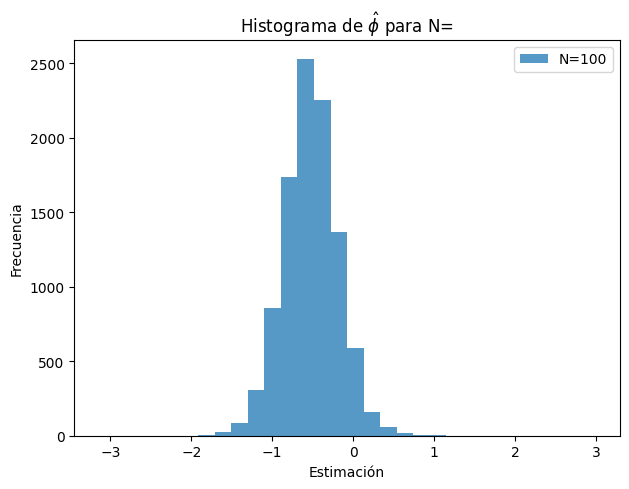

Para N=500 media es: -0.522052644535075 y varianza es: 0.020146136705969826


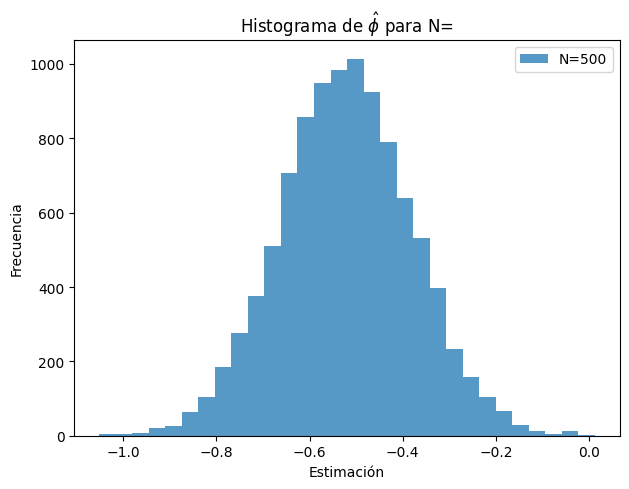

Para N=1000 media es: -0.52257797413375 y varianza es: 0.010208902661041037


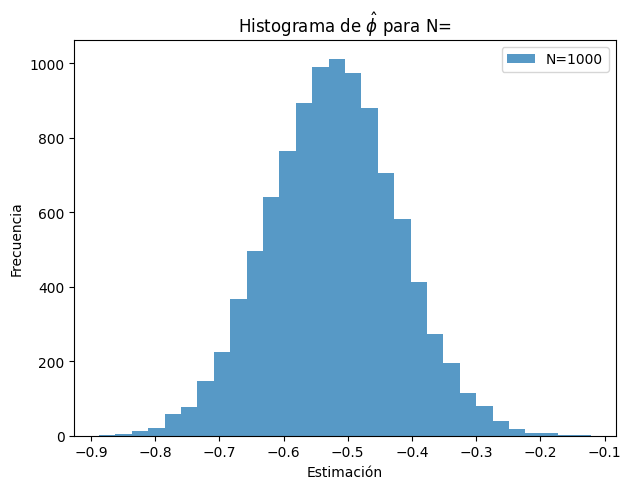

Para N=5000 media es: -0.5243604998770783 y varianza es: 0.0020315738751426277


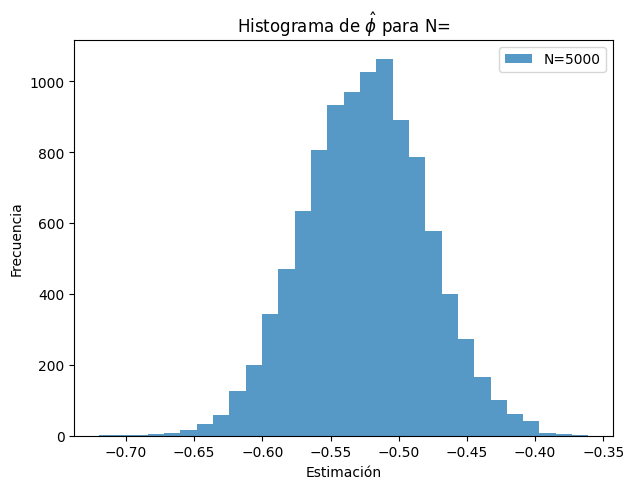

Para N=10000 media es: -0.5238306358934018 y varianza es: 0.001010719563282237


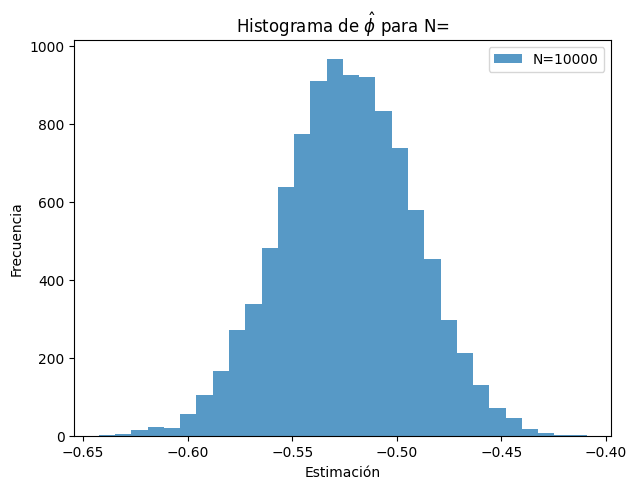

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = 1
f0 = 1 / 8
phi = np.pi / 6
sigma2 = 5
sigma = np.sqrt(sigma2)
N_values = [100, 500, 1000, 5000, 10000]
M = 10000

# Función para simular las observaciones y calcular los estimadores
def simulate_and_estimate(N):
    # Preparar las matrices H y W
    n = np.arange(N)
    H = A * np.column_stack((np.cos(2 * np.pi * f0 * n), np.sin(2 * np.pi * f0 * n)))
    cos_phi_estimates = []
    sin_phi_estimates = []
    
    # Simular M veces
    for _ in range(M):
        w = np.random.normal(0, sigma, N)
        x = A * np.cos(2 * np.pi * f0 * n + phi) + w
        theta_hat = np.linalg.inv(H.T @ H) @ H.T @ x
        cos_phi_estimates.append(theta_hat[0])
        sin_phi_estimates.append(theta_hat[1])
    
    return cos_phi_estimates, sin_phi_estimates

# Gráficos
for N in N_values:
    cos_phi_estimates, sin_phi_estimates = simulate_and_estimate(N)
    plt.figure(figsize=(12, 5))

    estimate = np.arctan2(sin_phi_estimates, cos_phi_estimates)
    print(f'Para N={N} media es: {np.mean(estimate)} y varianza es: {np.var(estimate)}')
    

    plt.subplot(1, 2, 2)
    plt.hist(estimate, bins=30, alpha=0.75, label=f'N={N}')
    plt.title(r'Histograma de $\hat{\phi}$ para N=')
    plt.xlabel('Estimación')
    plt.ylabel('Frecuencia')
    plt.legend()

    plt.tight_layout()
    plt.show()


### Comentarios:

Un detalle es que debido a la implementacion de np.arctan2 se calcula la estimacion correctamente a menos de un signo.

Por otro lado, se ve como la varianza se acerca al valor calculado de $\frac{2 \sigma^2}{NA^2}$. Ademas, dado que el estimador es asintoticamente eficiente, este valor se acerca a la cota de Cramer-Rao a medida que se aumenta la cantidad de muestras.